### First Look at stimuli for the experience

In [1]:
import numpy as np
np.random.seed(42)
import plotly.express as px
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (18,9)
plt.style.use('ggplot')

from matplotlib import patheffects

In [2]:
possible_means = list(range(1750))
possible_means = possible_means[1250:]
mean = np.random.choice(possible_means,1)
small_std = 10
big_std = 150

sample_small_std = np.random.normal(loc=mean[0], scale=small_std, size=10000)
sample_big_std = np.random.normal(loc=mean[0], scale=big_std, size=10000)

print(f"The mean of the distribution is {mean[0]}")

The mean of the distribution is 1352


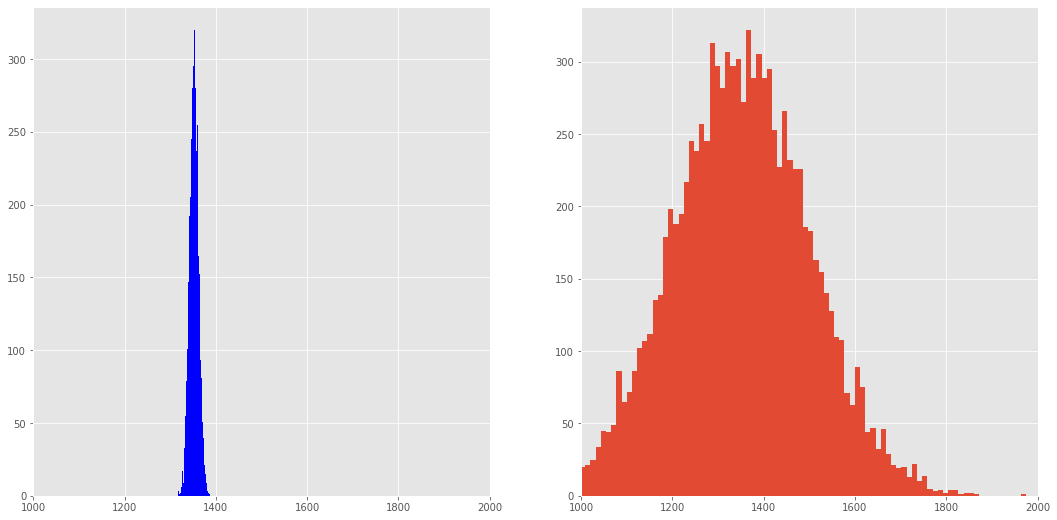

In [3]:
figure, axis = plt.subplots(1,2)
axis[0].hist(sample_small_std,bins = 100,color='blue')
axis[0].set_xlim(1000,2000)
axis[1].hist(sample_big_std,bins = 100)
axis[1].set_xlim(1000,2000)
plt.show()

In [14]:
def create_normal_distrib(mean,std,size,seed):
    
    normal_distrib = np.random.normal(loc=mean, scale=std, size=size)
    return(normal_distrib)


def create_draw_experiment(sample_to_draw,size_sample=6,mean_factor=5,seed=42,y=1000):

    mean_small_sample_x = list(np.random.choice(sample_to_draw,size = size_sample * mean_factor))
    small_sample_x = [0] * size_sample
    i = 0
    j = 0
    while j < size_sample:
        k=0
        while k < mean_factor:
            small_sample_x[j] = small_sample_x[j] + mean_small_sample_x[i]
            i+=1
            k+=1
        
        small_sample_x[j] = small_sample_x[j] / mean_factor
        j+=1
    small_sample_y = [y] * size_sample
    
    return(small_sample_x,small_sample_y)


def create_one_plot(sample_x,sample_y,x_line,y_line,xmin,xmax,ymin,ymax):
    figure, axis = plt.subplots(1,1,figsize = (20,3))    
    axis.set_xlim(xmin = xmin, xmax = xmax)
    axis.set_ylim(ymin = ymin, ymax = ymax)
    axis.get_yaxis().set_visible(False)
    axis.grid(False)
    
    for x_arrow in sample_x:
        axis.arrow(x = x_arrow,y=1500, dx = 0,dy = -500,width = 4,head_length = 150,length_includes_head = True)
    
    axis.errorbar(x_line,y_line, yerr = 75, alpha = 0.7)
    
    return(figure)
    

def create_plot_one_draw(i,j,sample_x,sample_y,x_line,y_line,xmin,xmax,ymin,ymax):
    
    axis[i,j].scatter(sample_x,sample_y,marker = "+",s = 0,color='blue')
    axis[i,j].set_xlim(xmin = xmin, xmax = xmax)
    axis[i,j].set_ylim(ymin = ymin, ymax = ymax)
    axis[i,j].get_yaxis().set_visible(False)
    axis[i,j].grid(False)
    for x_arrow in sample_x:
        axis[i,j].arrow(x = x_arrow,y=1500, dx = 0,dy = -500,width = 3,head_length = 125,length_includes_head = True)
    
    axis[i,j].errorbar(x_line,y_line, yerr = 75, alpha = 0.7)
    
    
def create_pairings(list_mean,list_std,list_npoints,n_iteration_per_condition):
    res = np.empty((n_iteration_per_condition,len(list_npoints)+len(list_std)))
    temp_list_mean = list_mean
    for i_iter in range(n_iteration_per_condition):
        for i_std in range(len(list_std)):
            for i_npoints in range(len(list_npoints)):
                i_mean = np.random.choice(len(temp_list_mean))
                mean = temp_list_mean.pop(i_mean)
                res[i_iter,i_std+i_npoints] = mean
    return(res)


def create_one_plot_from_scratch(mean,std,size_sample,mean_factor,seed,x_line,y_line,xmin,xmax,ymin,ymax):
    
    sample = create_normal_distrib(mean=mean,std=std,size=10000,seed=seed)
    
    sample_x,sample_y = create_draw_experiment(sample_to_draw=sample,size_sample=size_sample,mean_factor=mean_factor,seed=seed)
    
    figure = create_one_plot(sample_x=sample_x,sample_y = sample_y,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
    
    return(figure)
                
        

C:\Users\DIEU\AppData\Local\Temp/ipykernel_3604/4132896221.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure, axis = plt.subplots(1,1,figsize = (20,3))


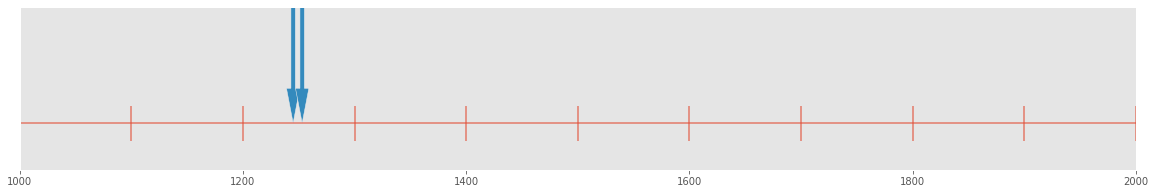

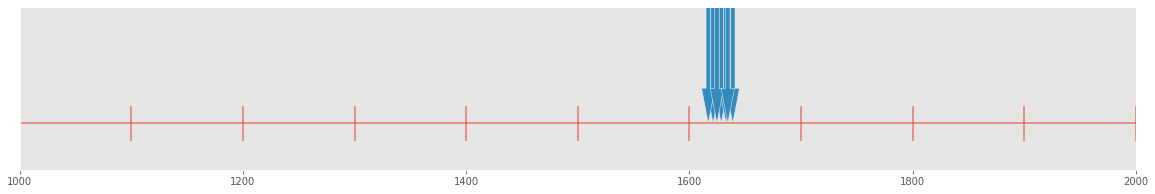

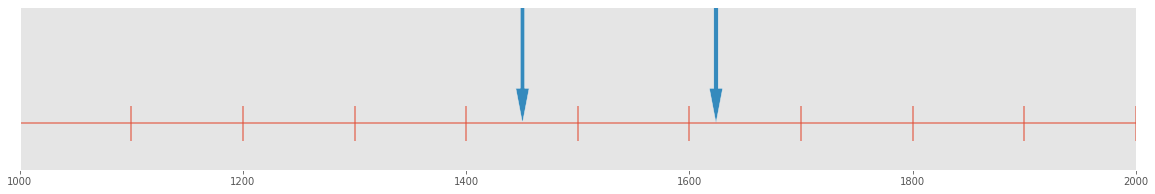

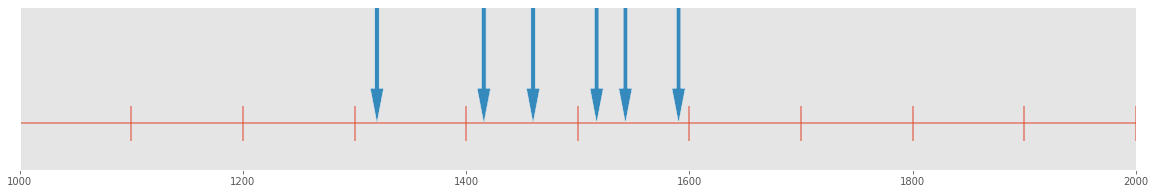

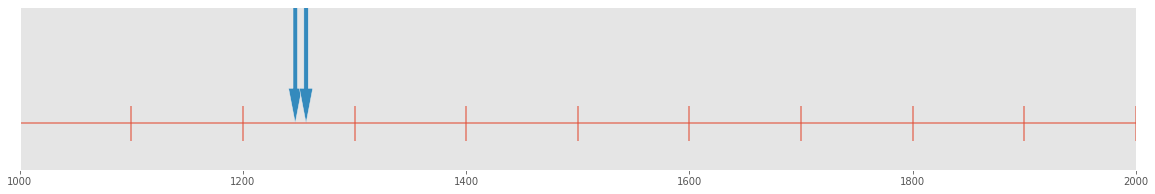

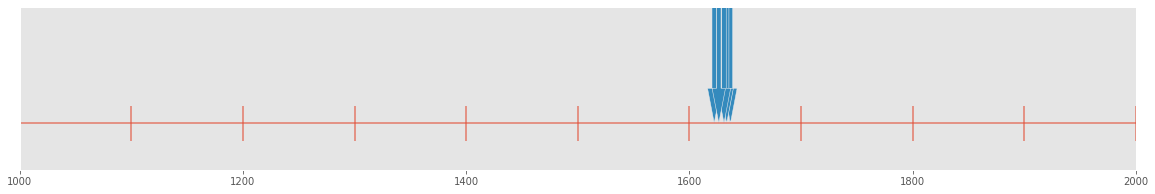

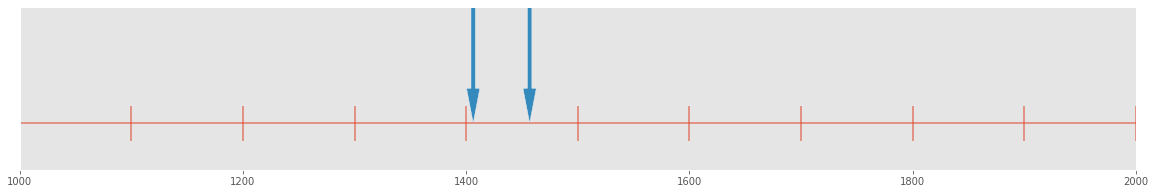

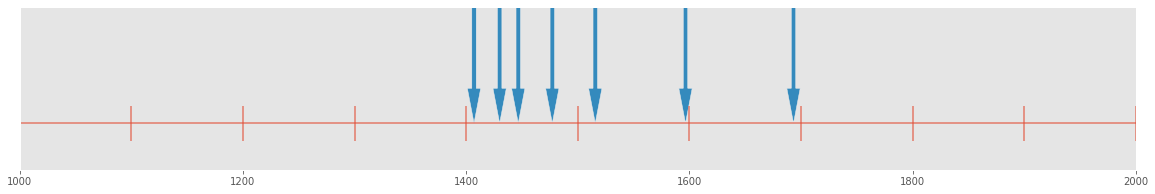

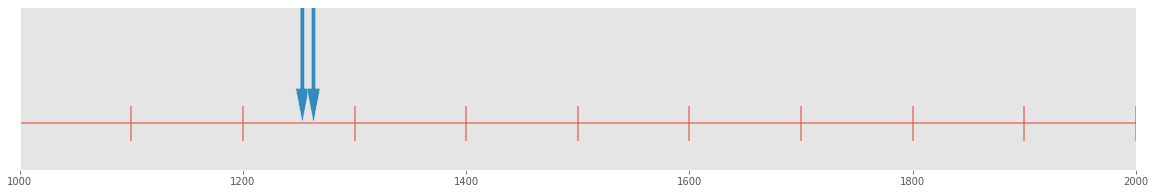

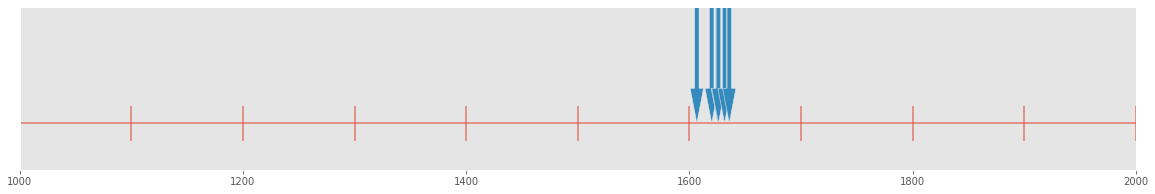

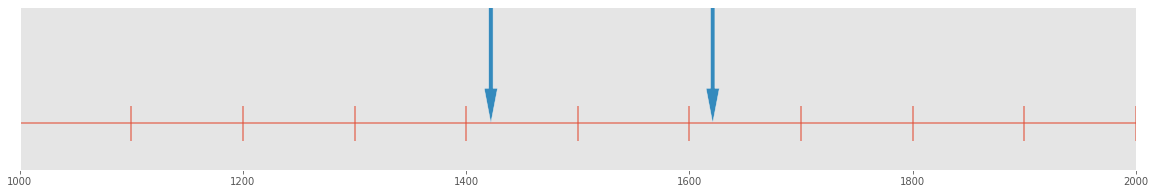

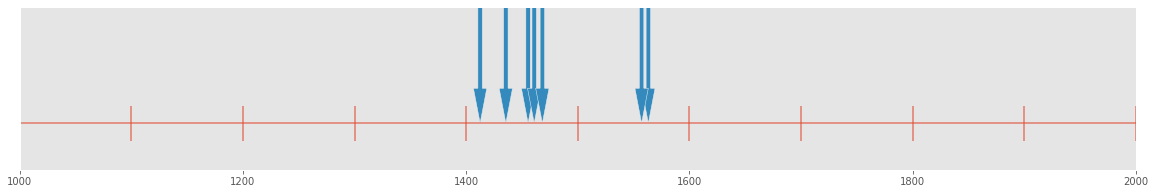

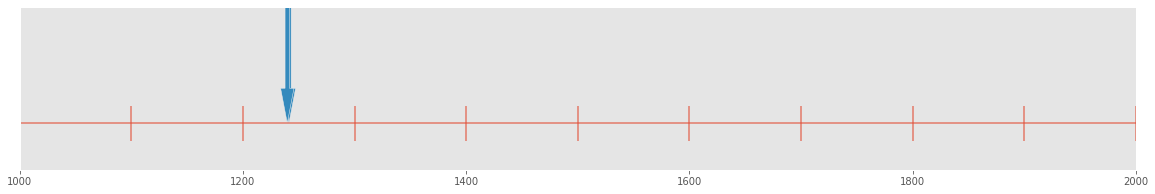

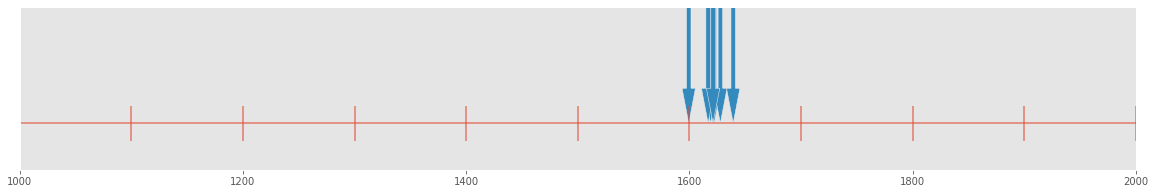

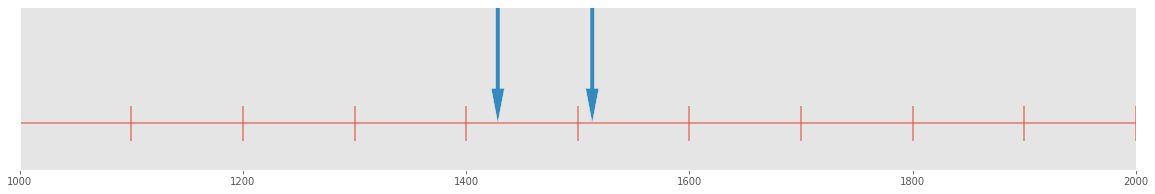

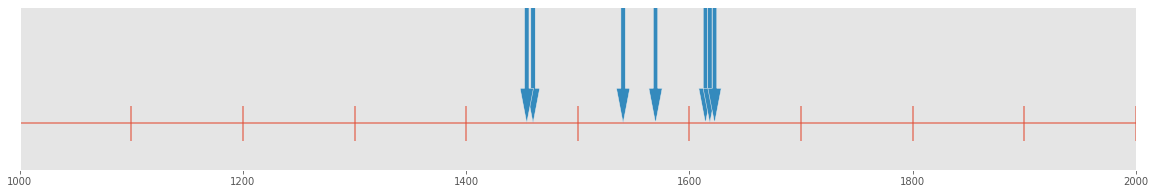

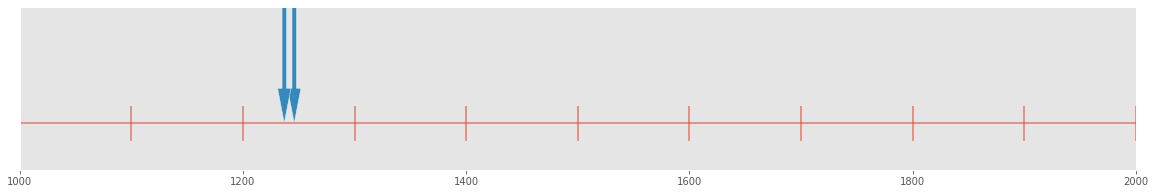

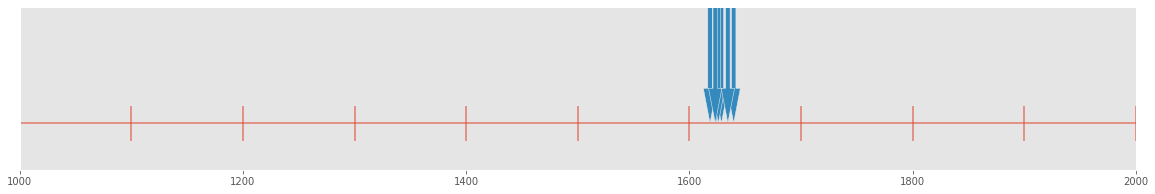

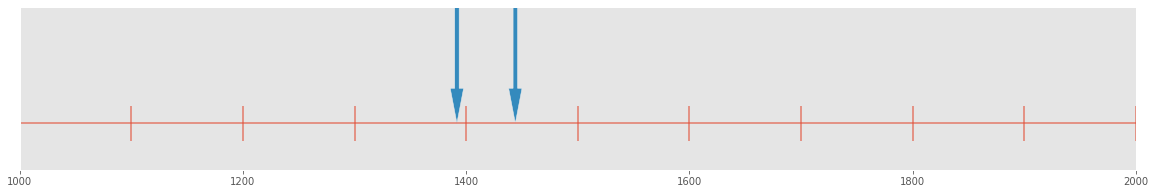

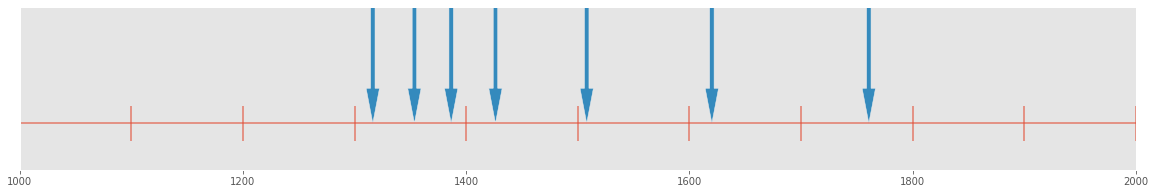

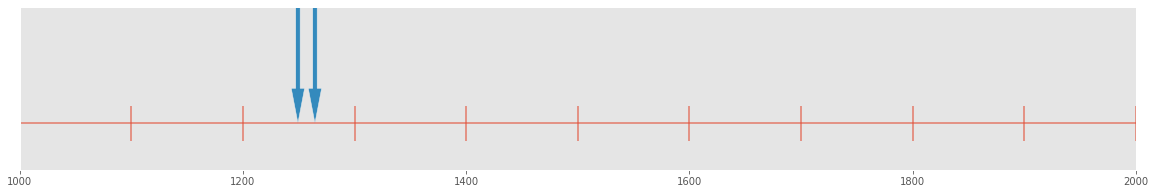

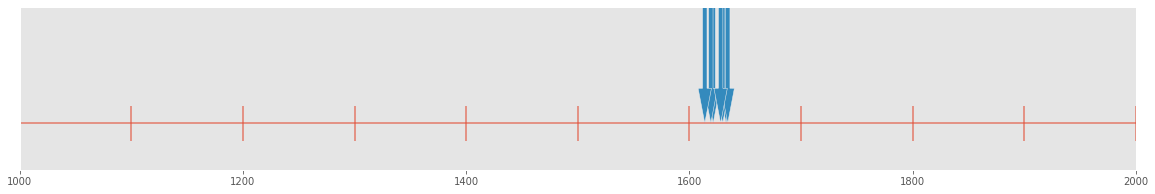

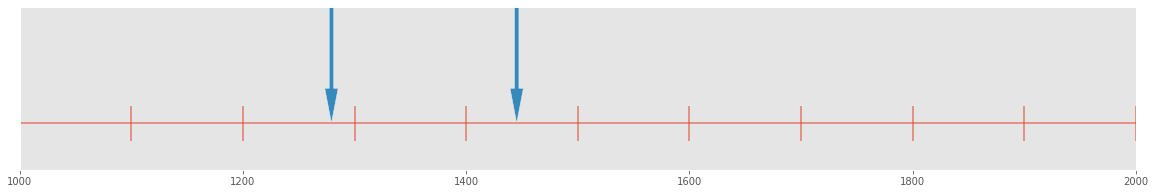

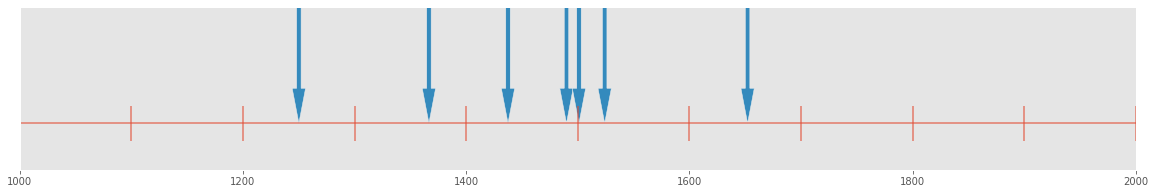

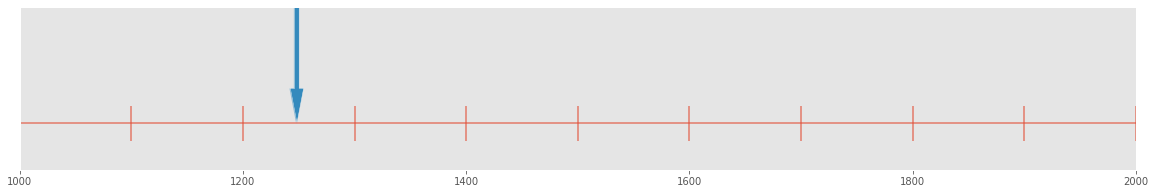

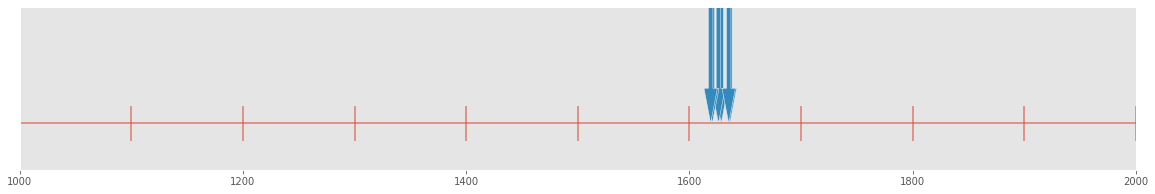

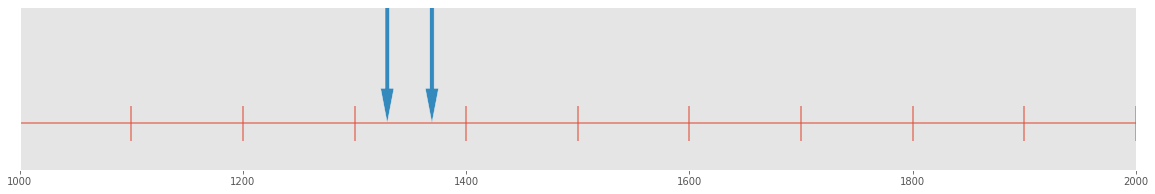

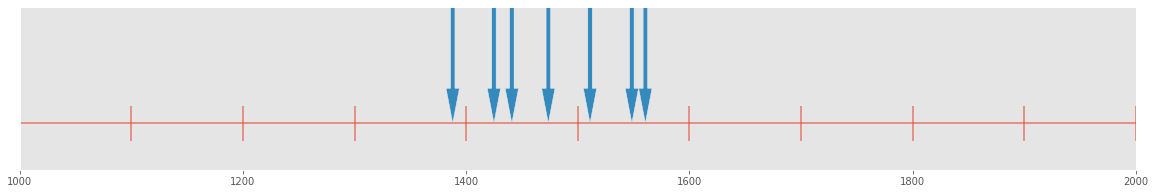

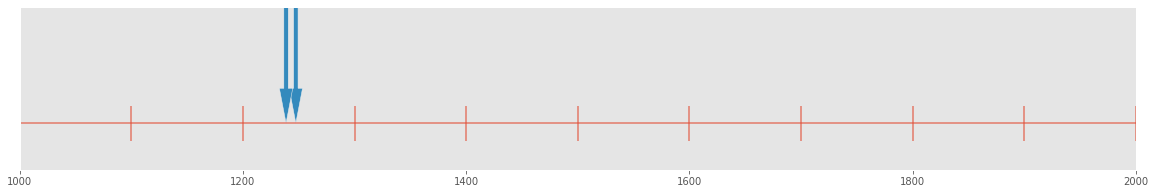

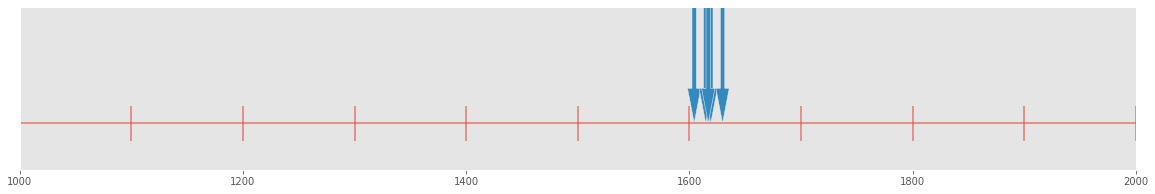

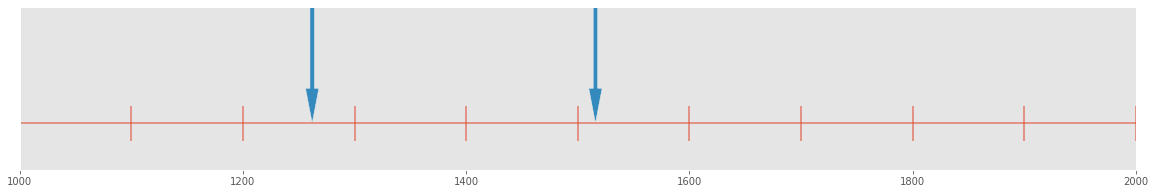

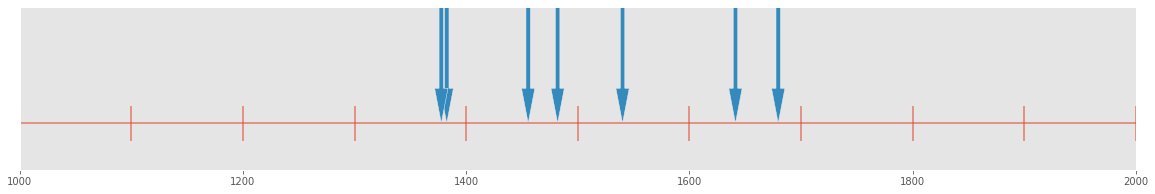

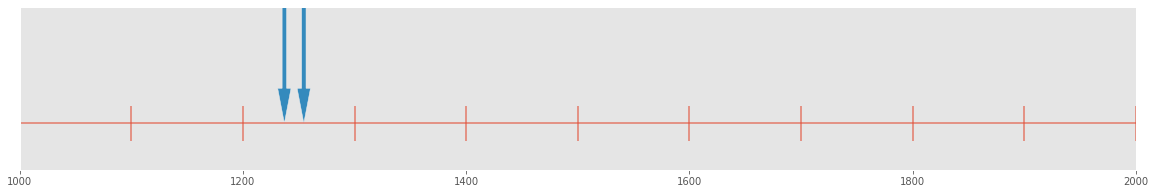

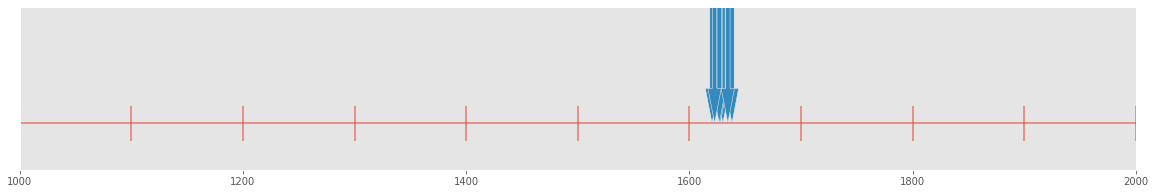

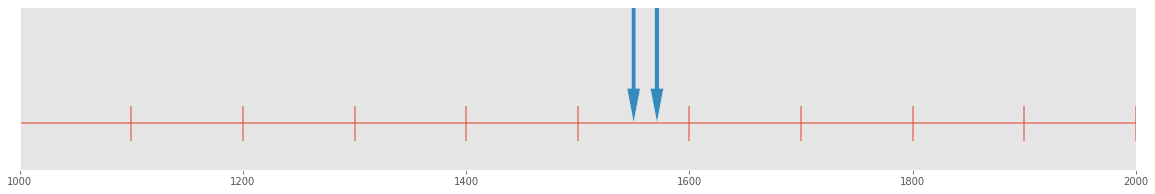

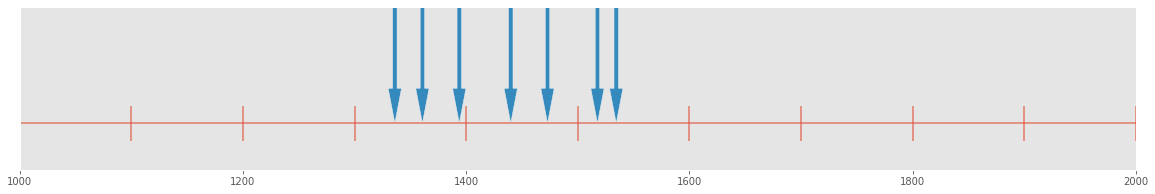

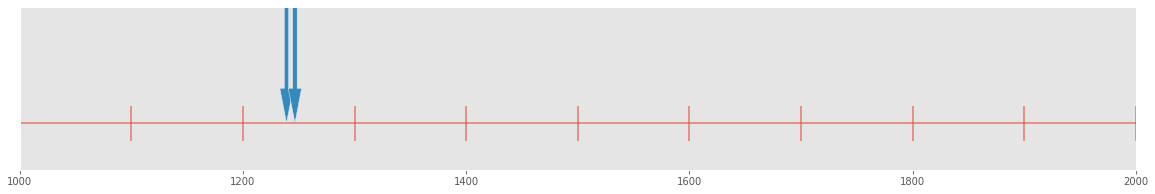

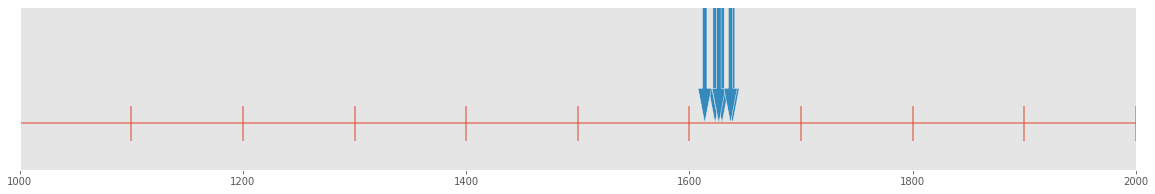

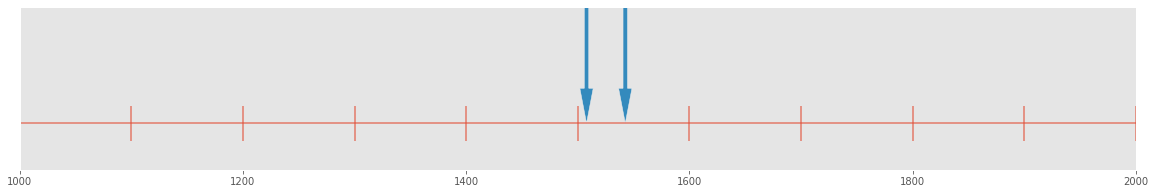

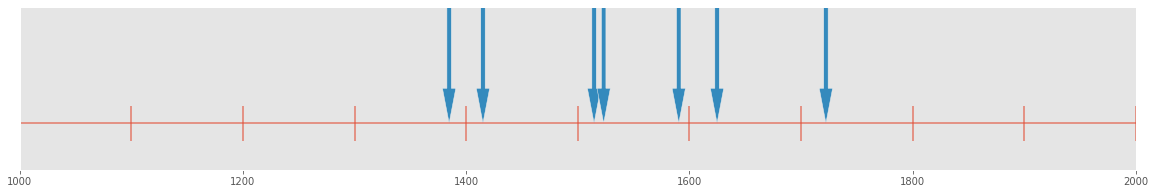

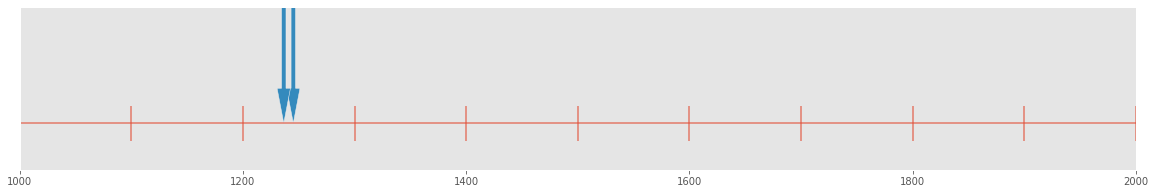

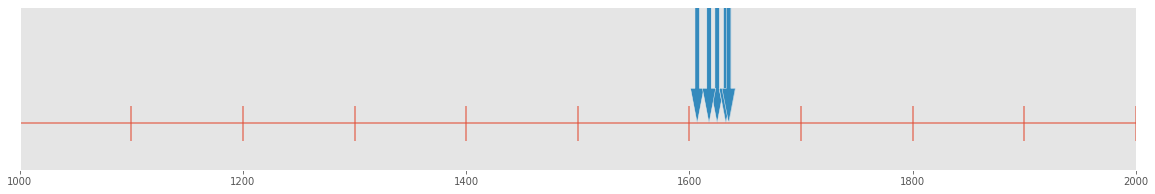

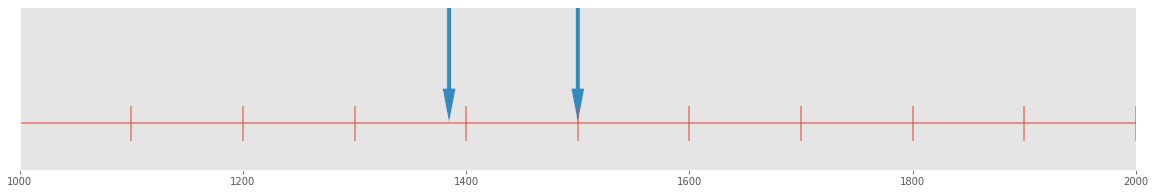

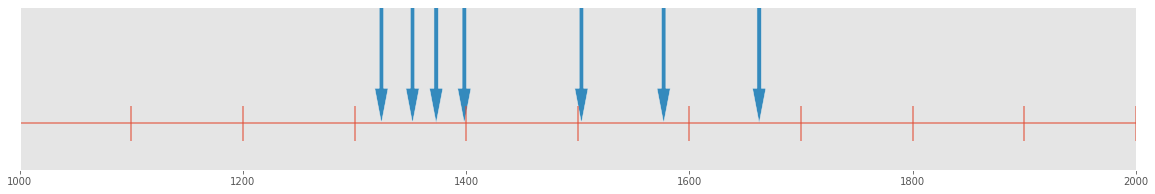

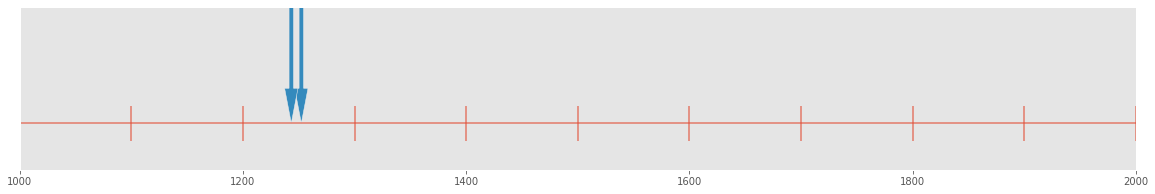

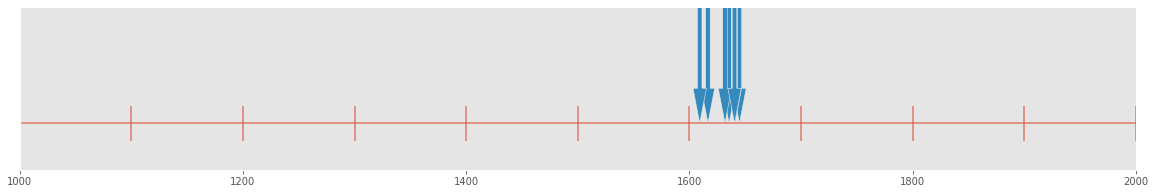

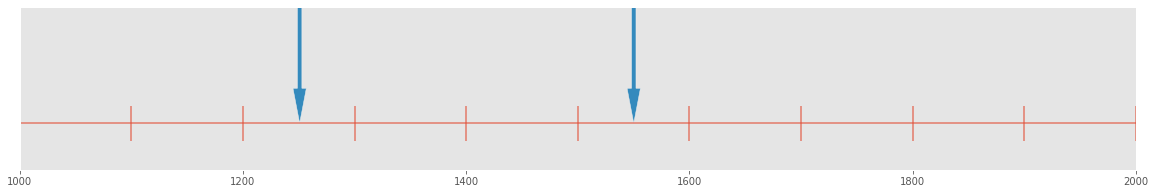

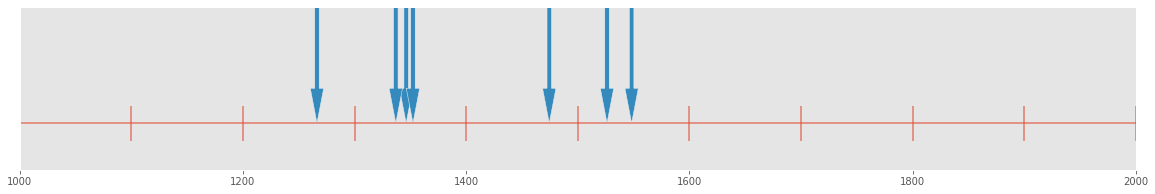

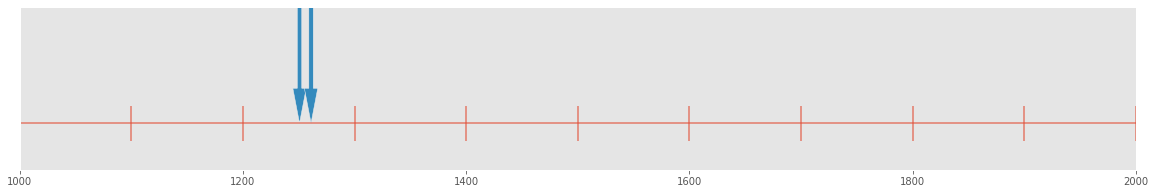

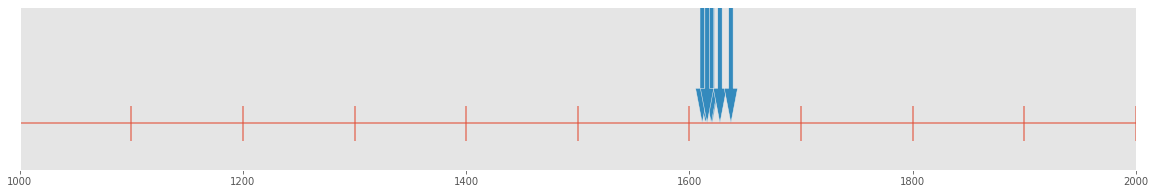

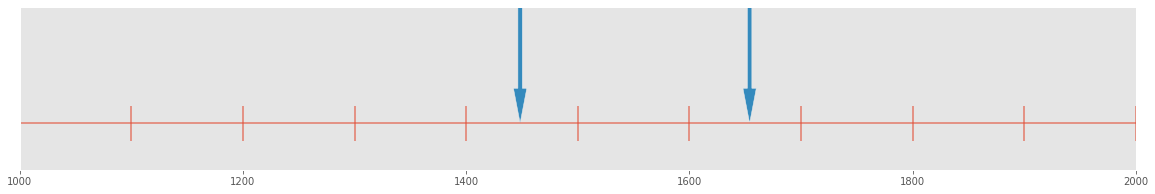

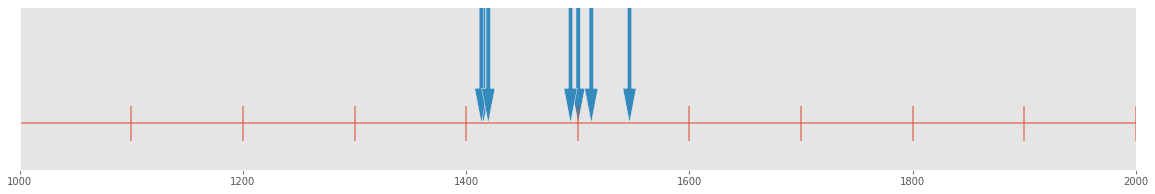

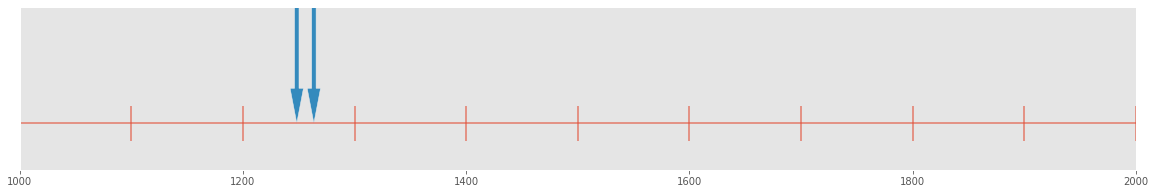

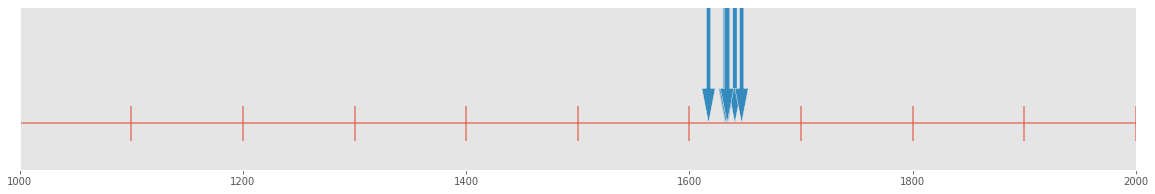

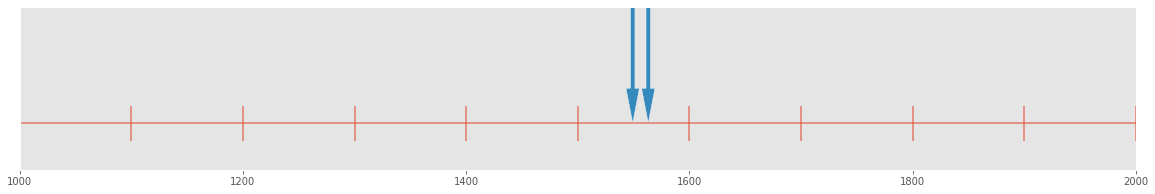

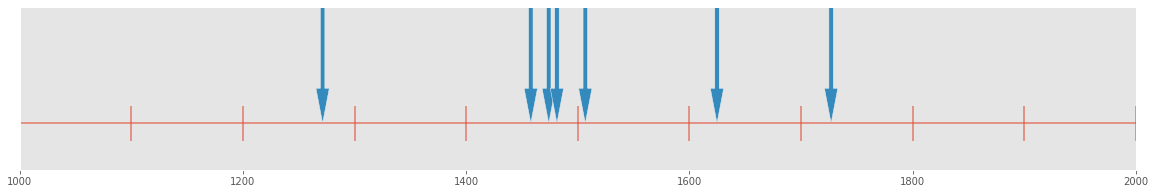

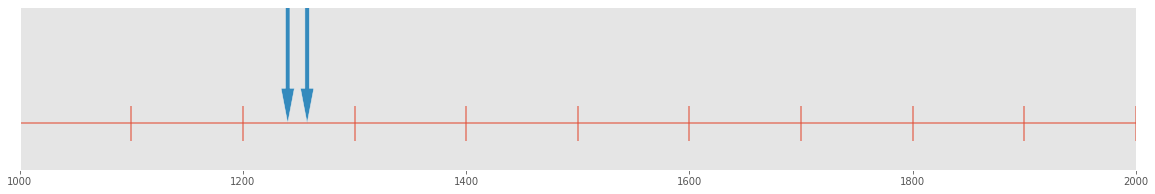

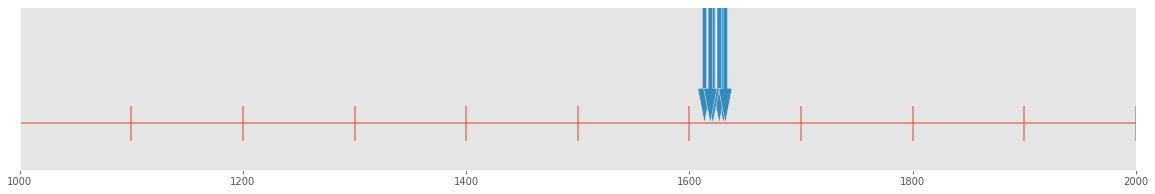

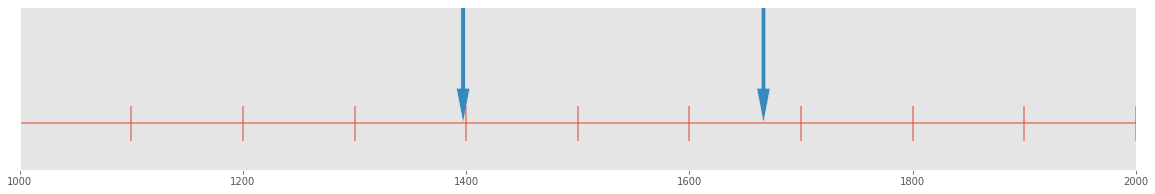

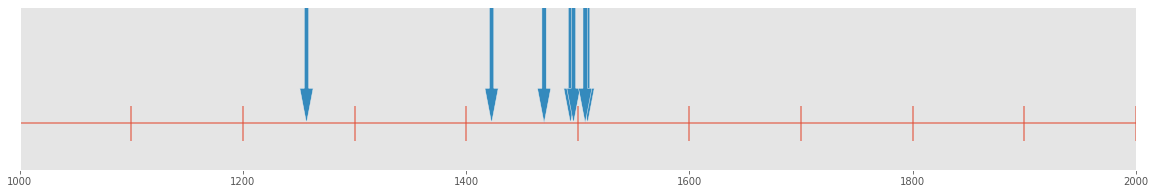

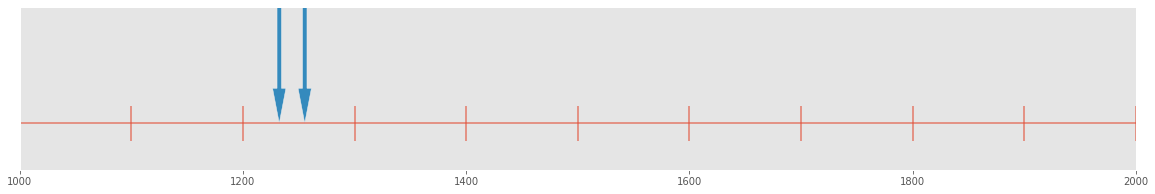

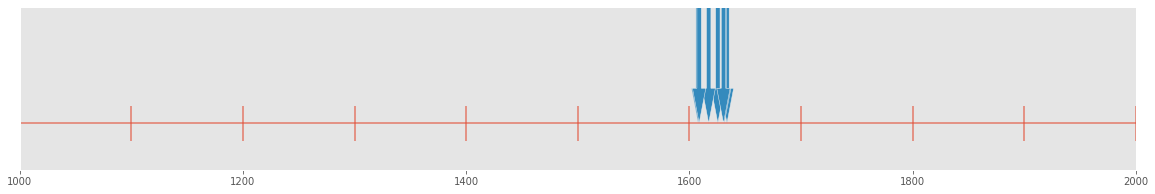

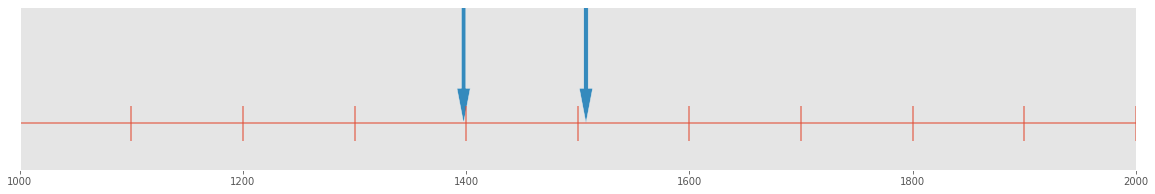

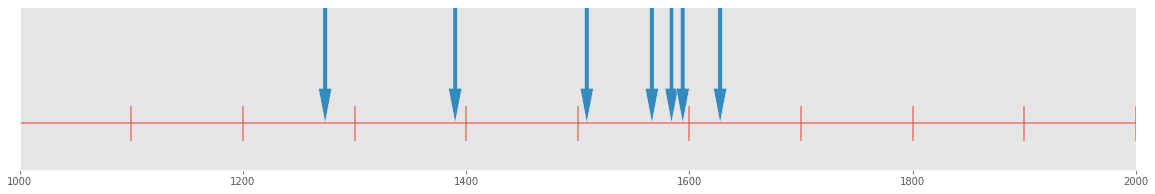

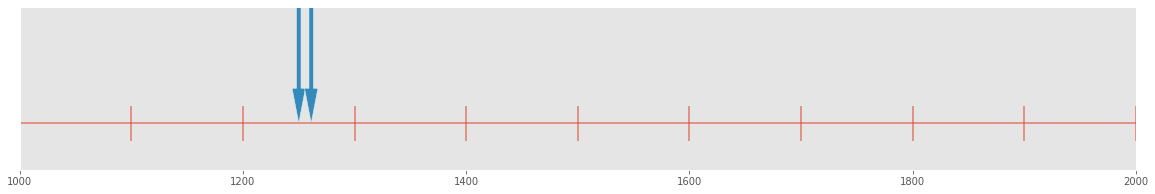

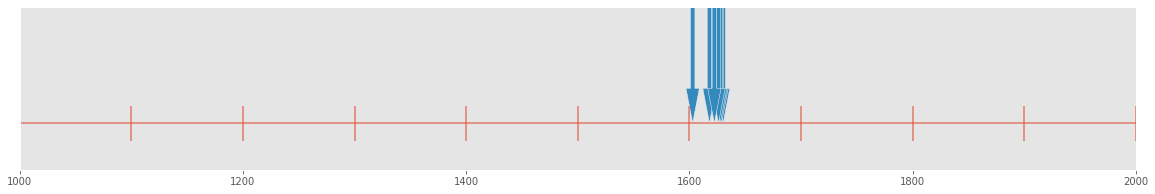

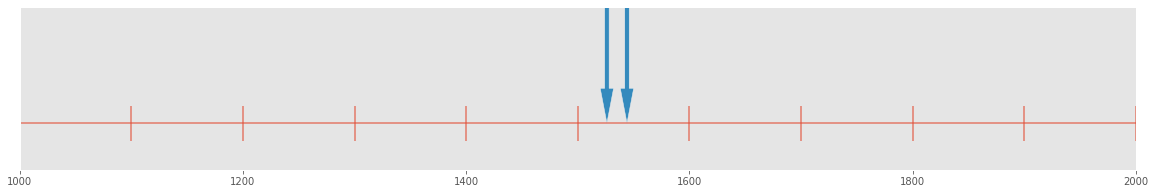

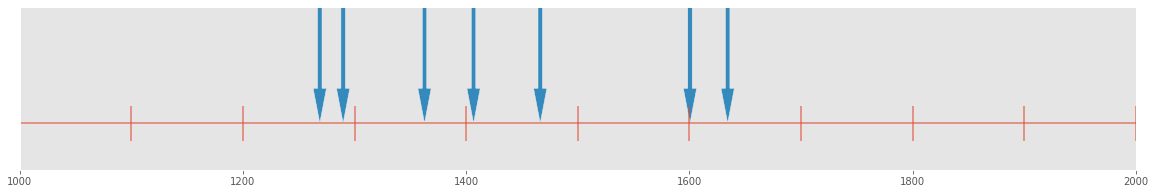

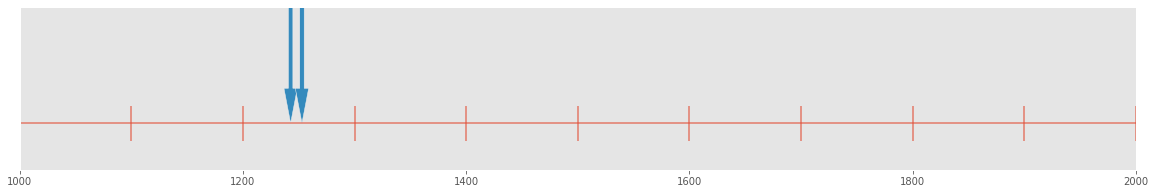

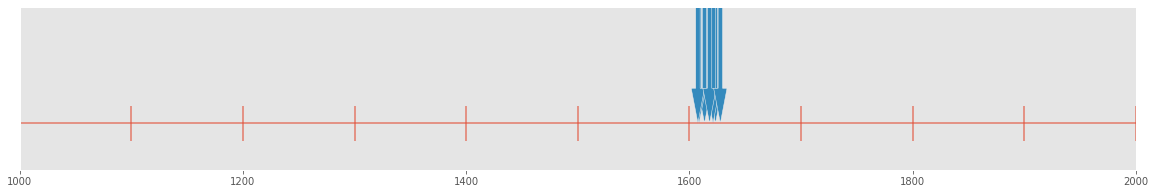

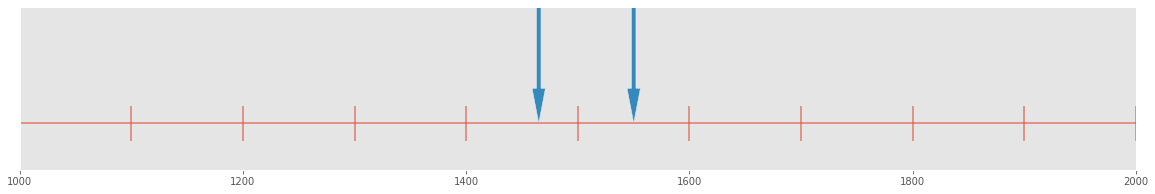

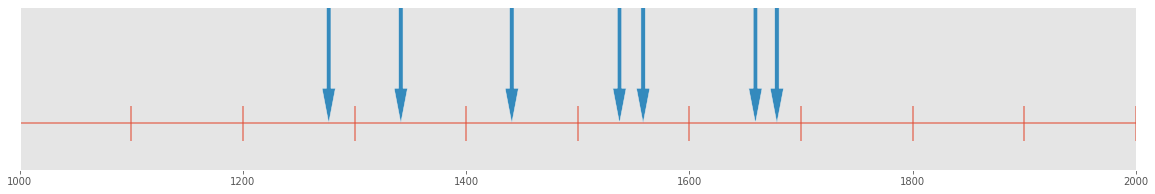

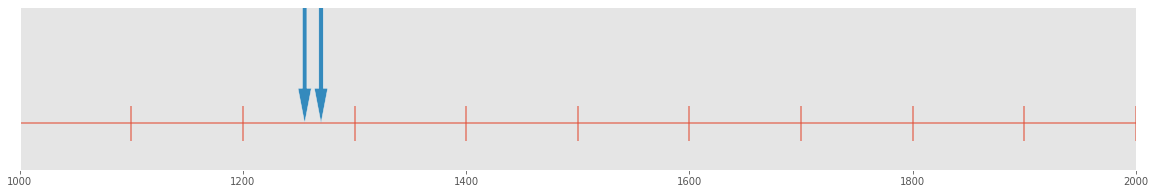

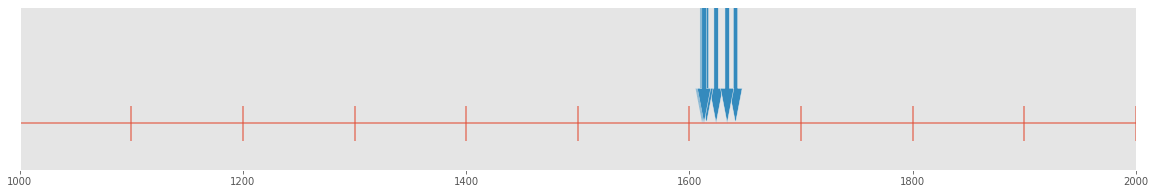

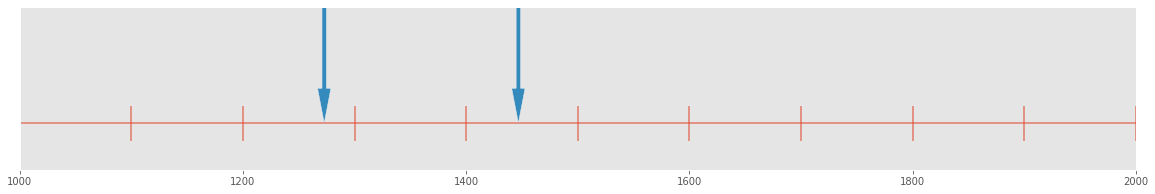

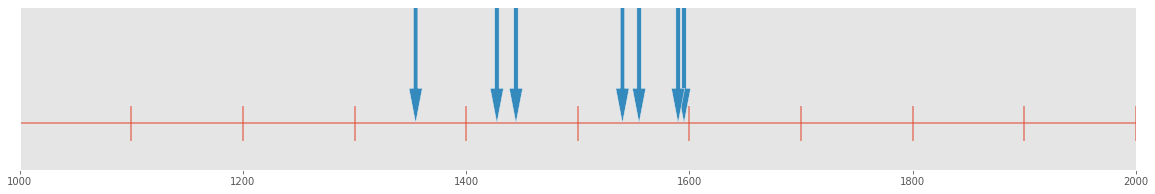

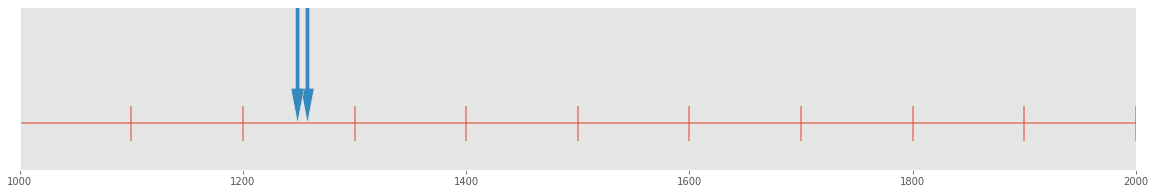

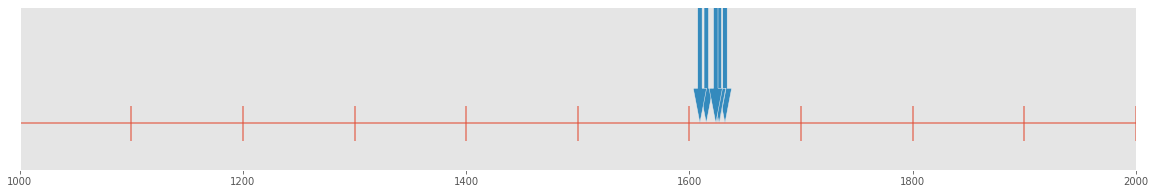

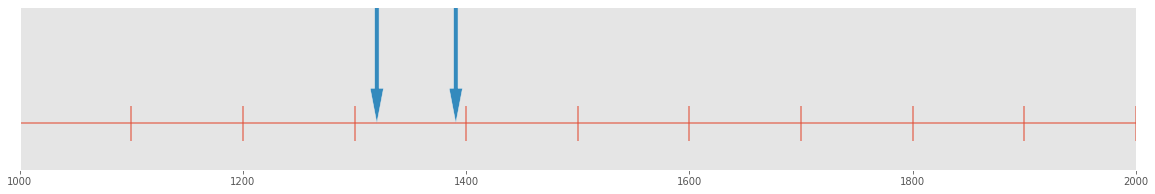

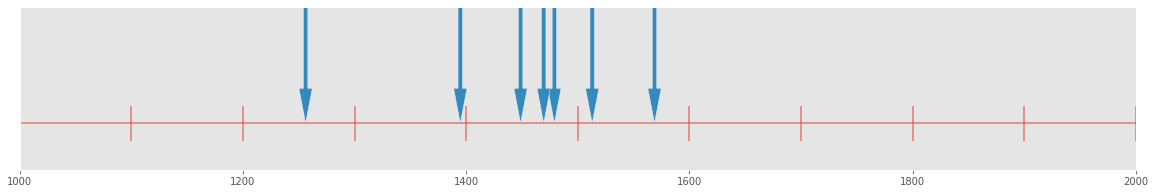

In [104]:
start_mean =1250
end_mean = 1775
list_std = [10,100]
list_npoints = [2,7]
n_iteration_per_condition = 2
n_conditions = (len(list_std) * len(list_npoints)) * n_iteration_per_condition
list_mean = list(np.linspace(start_mean,end_mean,n_conditions))
n_samples = 10
mean_factor = 1
seed = np.random.seed(50)

#Parameters
small_std = 10
big_std = 100

small_size_sample = 2
big_size_sample = 7
seed = 51

    #Plotting 
xmin = 1000
xmax = 2000

ymin = 800
ymax = 1500
x_line = list(range(xmin,xmax+200,100))
y_line = [1000] * len(x_line)


list_of_means = create_pairings(list_mean,list_std,list_npoints,n_iteration_per_condition)
fig_list = np.empty((4,n_iteration_per_condition),dtype="object")
final_result = np.empty(shape = (4,n_iteration_per_condition,n_samples),dtype="object")

for sample in range(n_samples):
    for iteration in range(n_iteration_per_condition):     
        
        fig_list[0,iteration] = create_one_plot_from_scratch(mean=list_of_means[0][0],std=small_std,size_sample=small_size_sample,mean_factor=mean_factor,seed=seed,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
        fig_list[1,iteration] =create_one_plot_from_scratch(mean=list_of_means[0][1],std=small_std,size_sample=big_size_sample,mean_factor=mean_factor,seed=seed,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
        fig_list[2,iteration] =create_one_plot_from_scratch(mean=list_of_means[0][2],std=big_std,size_sample=small_size_sample,mean_factor=mean_factor,seed=seed,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
        fig_list[3,iteration] =create_one_plot_from_scratch(mean=list_of_means[0][3],std=big_std,size_sample=big_size_sample,mean_factor=mean_factor,seed=seed,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
    
        final_result[:,iteration,sample] = fig_list[:,iteration]
        
# TODO pour chaque sample: create folder with adequate name, and save the 8 fig in the folder

(4, 2, 10)

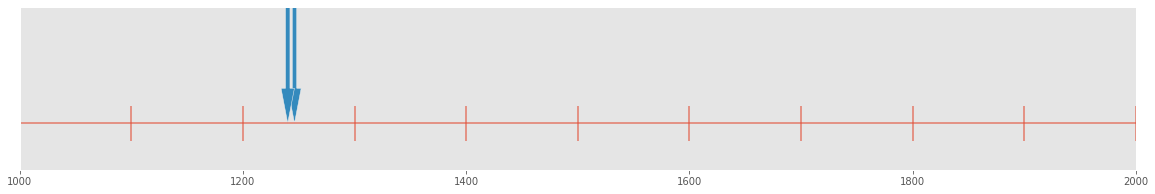

In [34]:
figure = create_one_plot_from_scratch(mean=list_of_means[0][0],std=small_std,size_sample=small_size_sample,mean_factor=mean_factor,seed=seed,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)

In [24]:
fig_list[0][0] = figure

TypeError: float() argument must be a string or a number, not 'Figure'

The mean of the distribution is 1479


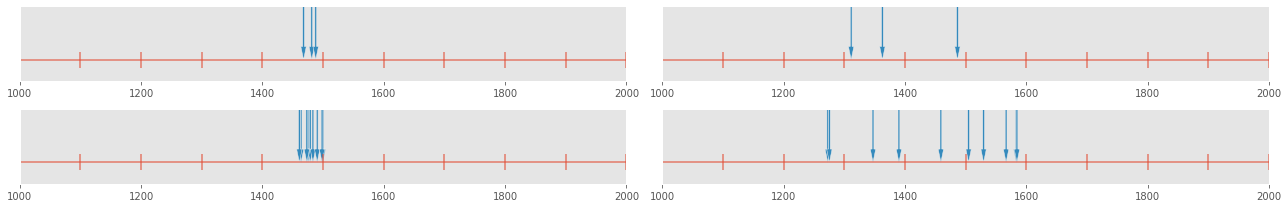

The mean of the distribution is 1320


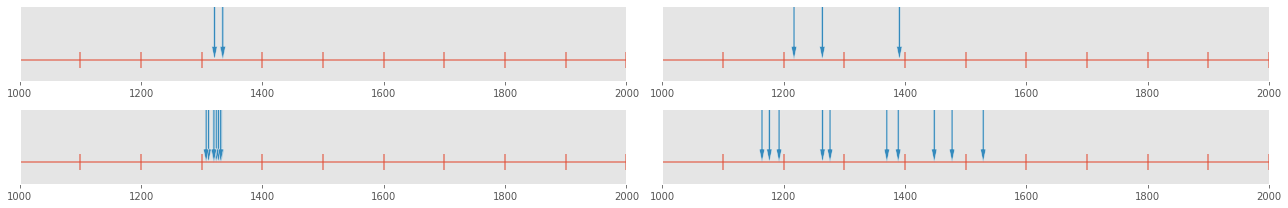

The mean of the distribution is 1528


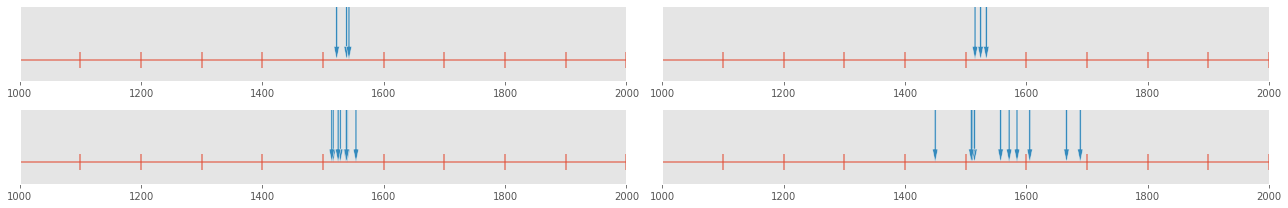

The mean of the distribution is 1487


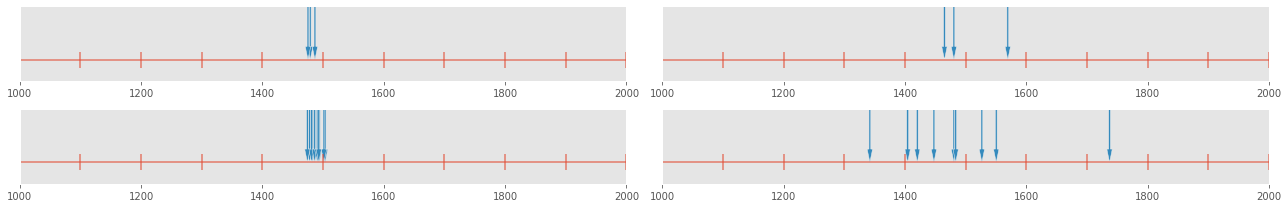

The mean of the distribution is 1383


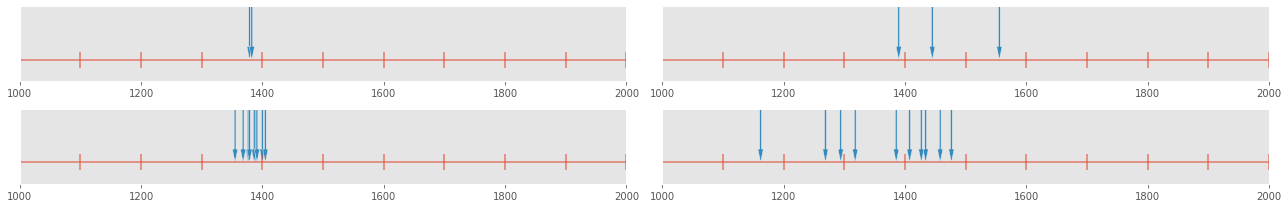

The mean of the distribution is 1508


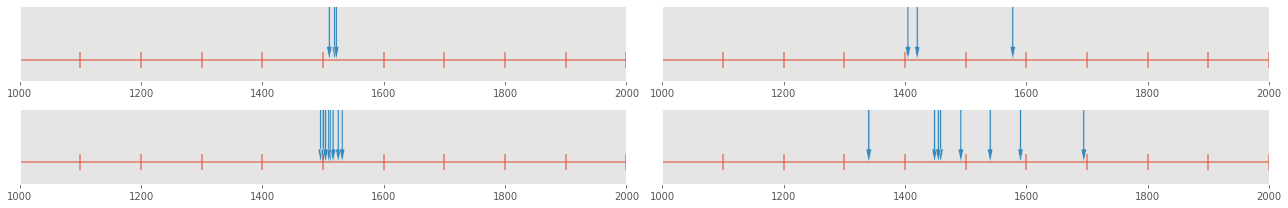

The mean of the distribution is 1345


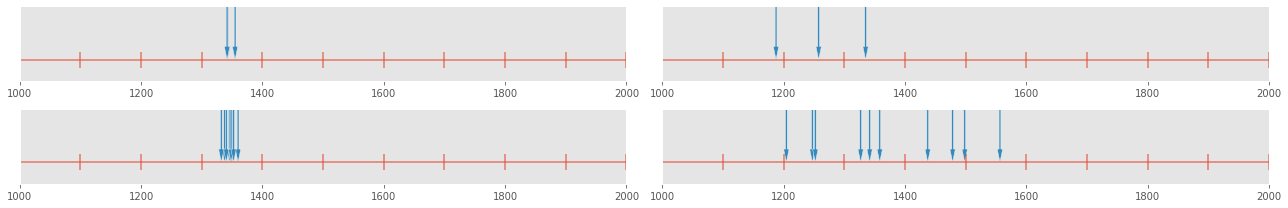

The mean of the distribution is 1500


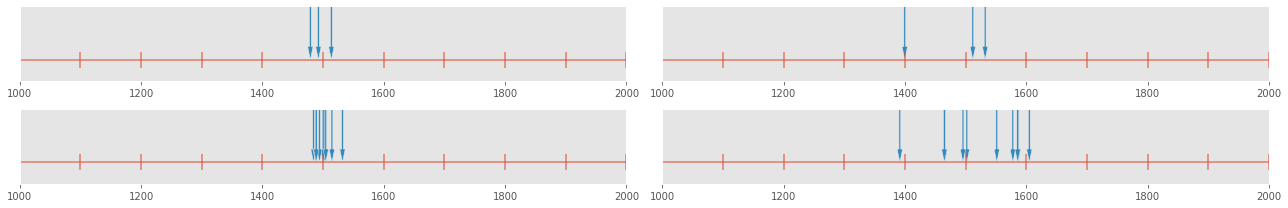

The mean of the distribution is 1321


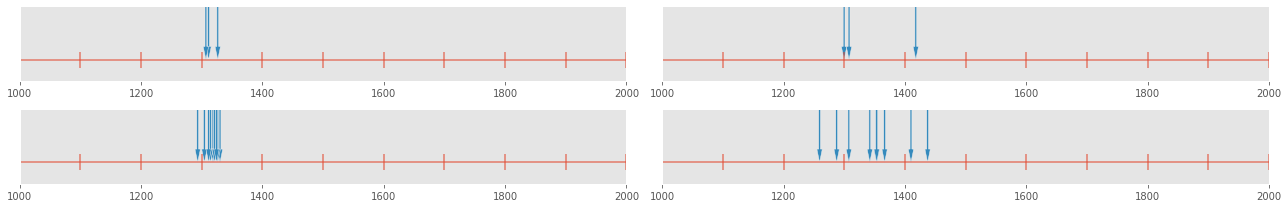

The mean of the distribution is 1617


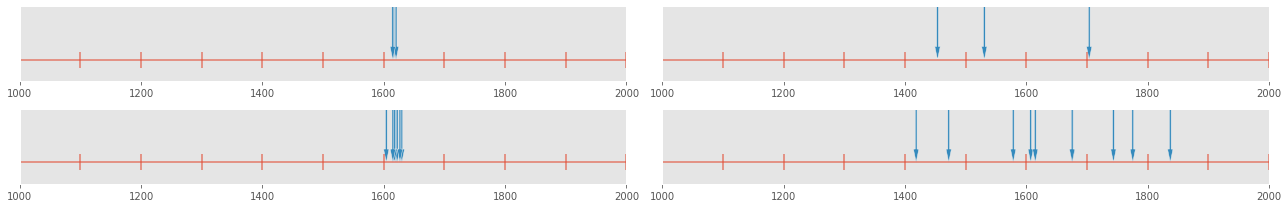

In [220]:
n_distrib_per_condition = 10
possible_means = list(range(1750))
possible_means = possible_means[1250:]
mean = np.random.choice(possible_means,n_distrib_per_condition)
small_std = 10
big_std = 100
seed = 51

    #Plotting 
xmin = 1000
xmax = 2000

ymin = 800
ymax = 1500
x_line = list(range(xmin,xmax+200,100))
y_line = [1000] * len(x_line)
yerr_line = [50] * len(x_line)
 
for i in range(n_distrib_per_condition):
    print(f"The mean of the distribution is {mean[i]}")
    mean_condition = mean[i]
    sample_small_std = np.random.normal(loc=mean_condition, scale=small_std, size=10000)
    sample_big_std = np.random.normal(loc=mean_condition, scale=big_std, size=10000)
    # figure, axis = plt.subplots(1,2)
    # axis[0].hist(sample_small_std,bins = 100,color='blue')
    # axis[0].set_xlim(1000,2000)
    # axis[1].hist(sample_big_std,bins = 100)
    # axis[1].set_xlim(1000,2000)
    # plt.show()
    
    #Create Figure
    figure, axis = plt.subplots(2,2,figsize = (18,3))
    
    #Small amount of points
    size_sample = 3
    mean_factor = 1

    small_sample_x,small_sample_y = create_draw_experiment(sample_small_std,size_sample,mean_factor,seed)
    big_sample_x,big_sample_y = create_draw_experiment(sample_big_std,size_sample,mean_factor,seed)
    
    create_plot_one_draw(i=0,j=0,sample_x=small_sample_x,sample_y = small_sample_y,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
    create_plot_one_draw(i=0,j=1,sample_x=big_sample_x,sample_y = big_sample_y,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)


    size_sample = 10
    mean_factor = 1

    small_sample_x,small_sample_y = create_draw_experiment(sample_small_std,size_sample,mean_factor,seed)
    big_sample_x,big_sample_y = create_draw_experiment(sample_big_std,size_sample,mean_factor,seed)
    
    create_plot_one_draw(i=1,j=0,sample_x=small_sample_x,sample_y = small_sample_y,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
    create_plot_one_draw(i=1,j=1,sample_x=big_sample_x,sample_y = big_sample_y,x_line=x_line,y_line=y_line,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)

        
    figure.tight_layout()
    plt.show()
    
    



    
    
    


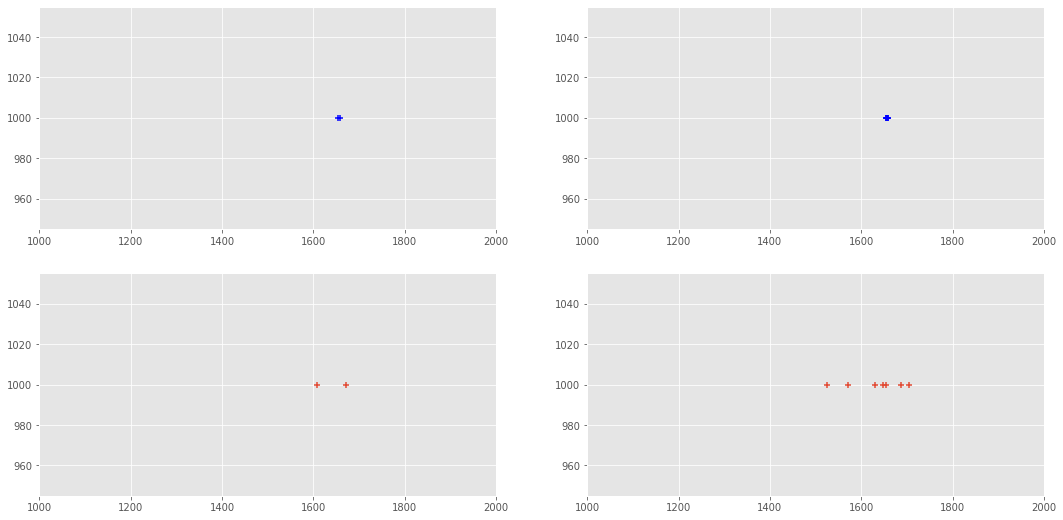

In [99]:
# seed = 51
# #Small amount of points
# size_sample = 2
# mean_factor = 5
# size = 40

# small_sample_x,small_sample_y = create_draw_experiment(sample_small_std,size_sample,mean_factor,seed)
# big_sample_x,big_sample_y = create_draw_experiment(sample_big_std,size_sample,mean_factor,seed)

# labels_small_sample = ["%.2f" % i for i in small_sample_y]
# labels_big_sample = ["%.2f" % i for i in big_sample_y]

# #Plotting 
# xmin = 1000
# xmax = 2000
# figure, axis = plt.subplots(2,2)
# axis[0,0].scatter(small_sample_x,small_sample_y,marker = "+",s = size,color='blue')
# axis[0,0].set_xlim(xmin = xmin, xmax = xmax)
# axis[0,0].set(ylabel = None)
# axis[0,0].set(xlabel = None)




# axis[1,0].scatter(big_sample_x,big_sample_y,marker = "+",s = size)
# axis[1,0].set_xlim(xmin=xmin,xmax = xmax)

# #Big amount of points

# size_sample = 7
# mean_factor = 5

# small_sample_x,small_sample_y = create_draw_experiment(sample_small_std,size_sample,mean_factor,seed)
# big_sample_x,big_sample_y = create_draw_experiment(sample_big_std,size_sample,mean_factor,seed)


# #Plotting 

# axis[0,1].scatter(small_sample_x,small_sample_y,marker = "+",s = size,color='blue')
# axis[0,1].set_xlim(xmin = xmin, xmax = xmax)
# axis[1,1].scatter(big_sample_x,big_sample_y,marker = "+",s = size)
# axis[1,1].set_xlim(xmin=xmin,xmax = xmax)


# plt.show()


#     axis[0,0].scatter(small_sample_x,small_sample_y,marker = "+",s = 0,color='blue')
#     axis[0,0].set_xlim(xmin = xmin, xmax = xmax)
#     axis[0,0].set_ylim(ymin = ymin, ymax = ymax)
#     axis[0,0].get_yaxis().set_visible(False)
#     # axis[0,0].get_xaxis().set_visible(False)
#     axis[0,0].grid(False)
#     for x_arrow in small_sample_x:
#         axis[0,0].arrow(x = x_arrow,y=1500, dx = 0,dy = -500,width = 4,head_length = 150,length_includes_head = True)
    
#     axis[0,0].errorbar(x_line,y_line,xerr = None,yerr = 75, alpha = 0.7)
    
#     axis[0,1].scatter(big_sample_x,big_sample_y,marker = "+",s = size,color='blue')
#     axis[0,1].set_xlim(xmin=xmin,xmax = xmax)
#     axis[0,1].get_yaxis().set_visible(False)
#     axis[0,1].get_xaxis().set_visible(False)
#     axis[0,1].grid(False)

#     #Big amount of points

#     size_sample = 7
#     mean_factor = 1

#     small_sample_x,small_sample_y = create_draw_experiment(sample_small_std,size_sample,mean_factor,seed)
#     big_sample_x,big_sample_y = create_draw_experiment(sample_big_std,size_sample,mean_factor,seed)


#     #Plotting 

#     axis[1,0].scatter(small_sample_x,small_sample_y,marker = "+",s = size,color='blue')
#     axis[1,0].scatter(small_sample_x,small_sample_y,marker = "+",s = size,color='blue')
#     axis[1,0].set_xlim(xmin = xmin, xmax = xmax)
#     axis[1,0].get_yaxis().set_visible(False)
#     axis[1,0].get_xaxis().set_visible(False)
#     axis[1,0].grid(False)
    
    
#     axis[1,1].scatter(big_sample_x,big_sample_y,marker = "+",s = size,color='blue')
#     axis[1,1].set_xlim(xmin=xmin,xmax = xmax)
#     axis[1,1].set_ylim(ymin=ymin,ymax = ymax)
#     axis[1,1].get_yaxis().set_visible(False)
#     axis[1,1].get_xaxis().set_visible(False)
#     axis[1,1].grid(False)